In [394]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.metrics import classification_report


In [395]:
data = pd.read_csv('../dataset/preprocessed_train_data')
data

,passenger_id,age,room_service,food_court,shopping_mall,spa,v_r_deck,name,transported,Europa,...,deck_D,deck_E,deck_F,deck_G,deck_T,deck_unknown,side_S,side_unknown,v_i_p_True,v_i_p_unknown
0,0001_01,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0002_01,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,0,...,0,0,1,0,0,0,1,0,0,0
2,0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,1,...,0,0,0,0,0,0,1,0,1,0
3,0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0004_01,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,41.0,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,1,...,0,0,0,0,0,0,0,0,1,0
8689,9278_01,18.0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,0,...,0,0,0,1,0,0,1,0,0,0
8690,9279_01,26.0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,0,...,0,0,0,1,0,0,1,0,0,0
8691,9280_01,32.0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,1,...,0,1,0,0,0,0,1,0,0,0


In [396]:
data = data.drop(columns=['passenger_id', 'name'])
data.columns = data.columns.str.lower()

In [397]:
data

,age,room_service,food_court,shopping_mall,spa,v_r_deck,transported,europa,mars,unknown_planet,...,deck_d,deck_e,deck_f,deck_g,deck_t,deck_unknown,side_s,side_unknown,v_i_p_true,v_i_p_unknown
0,39.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,16.0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
8689,18.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
8690,26.0,0.0,0.0,1872.0,1.0,0.0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [398]:
data

,age,room_service,food_court,shopping_mall,spa,v_r_deck,transported,europa,mars,unknown_planet,...,deck_d,deck_e,deck_f,deck_g,deck_t,deck_unknown,side_s,side_unknown,v_i_p_true,v_i_p_unknown
0,39.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,16.0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
8689,18.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
8690,26.0,0.0,0.0,1872.0,1.0,0.0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [399]:
data['had_room_service'] = (data['room_service'] > 0).astype(int) * 1000
data

,age,room_service,food_court,shopping_mall,spa,v_r_deck,transported,europa,mars,unknown_planet,...,deck_e,deck_f,deck_g,deck_t,deck_unknown,side_s,side_unknown,v_i_p_true,v_i_p_unknown,had_room_service
0,39.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1000
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1000
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,16.0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8689,18.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8690,26.0,0.0,0.0,1872.0,1.0,0.0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0


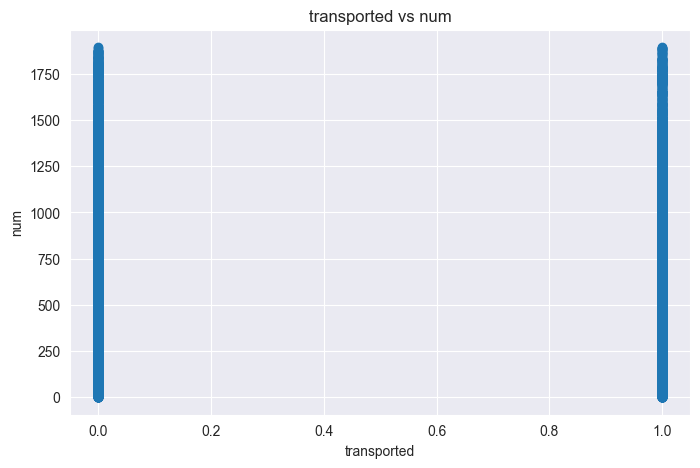

In [400]:
def data_scatter(f1, f2):
    plt.figure(figsize=(8, 5))
    plt.scatter(data[f1], data[f2])
    plt.xlabel(f1)
    plt.ylabel(f2)
    plt.title(f'{f1} vs {f2}')
    plt.show()

data_scatter('transported', 'num')

In [401]:
X = data.drop(columns='transported')
y = data['transported']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [402]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [403]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
X_train

,age,room_service,food_court,shopping_mall,spa,v_r_deck,europa,mars,unknown_planet,cryo_sleep_true,...,deck_e,deck_f,deck_g,deck_t,deck_unknown,side_s,side_unknown,v_i_p_true,v_i_p_unknown,had_room_service
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.215190,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.443038,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.329114,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.164557,0.000000,0.000000,0.004897,0.000045,0.253098,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6949,0.544304,0.000000,0.065307,0.000000,0.000000,0.081186,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6950,0.481013,0.012773,0.006809,0.000000,0.004909,0.018391,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6951,0.569620,0.000070,0.000235,0.004570,0.027356,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6952,0.303797,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [404]:
data_new = data[(data['transported'] == 1) & (data['room_service']) == 0]
len(data_new)

7930

In [405]:
763/6954

0.10972102387115329

In [406]:
test_data = pd.read_csv('../dataset/test_data_svm.csv')
test_data.columns = test_data.columns.str.lower()
test_data = test_data.drop(columns='has_family')
passenger_id = test_data['passenger_id']
test_data = test_data.drop(columns='passenger_id')
test_data['had_room_service'] = ((test_data['room_service'] > 0).astype(int)) * 1000

In [407]:
test_data

,age,room_service,food_court,shopping_mall,spa,v_r_deck,europa,mars,unknown_planet,cryo_sleep_true,...,deck_e,deck_f,deck_g,deck_t,deck_unknown,side_s,side_unknown,v_i_p_true,v_i_p_unknown,had_room_service
0,27.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
1,19.0,109.0,9.0,0.0,2823.0,0.0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1000
2,31.0,43.0,0.0,0.0,0.0,0.0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1000
3,38.0,0.0,6652.0,0.0,181.0,585.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,20.0,303.0,0.0,635.0,0.0,0.0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,34.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
4273,42.0,0.0,847.0,17.0,10.0,144.0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4274,26.0,375.0,0.0,0.0,0.0,0.0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1000
4275,26.0,0.0,2680.0,0.0,0.0,523.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [408]:
from catboost import CatBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

model = CatBoostClassifier(
    iterations=1000,         
    learning_rate=0.05,      
    depth=5,                 
    random_seed=42,
)


model.fit(X_train, y_train)

0:	learn: 0.6714688	total: 2.34ms	remaining: 2.34s
1:	learn: 0.6514529	total: 4.61ms	remaining: 2.3s
2:	learn: 0.6329686	total: 7.27ms	remaining: 2.42s
3:	learn: 0.6177389	total: 8.98ms	remaining: 2.23s
4:	learn: 0.6055836	total: 10.7ms	remaining: 2.12s
5:	learn: 0.5915338	total: 12.2ms	remaining: 2.02s
6:	learn: 0.5797683	total: 13.8ms	remaining: 1.96s
7:	learn: 0.5691346	total: 15.4ms	remaining: 1.92s
8:	learn: 0.5599461	total: 17.1ms	remaining: 1.88s
9:	learn: 0.5510209	total: 18.7ms	remaining: 1.85s
10:	learn: 0.5448795	total: 20.6ms	remaining: 1.85s
11:	learn: 0.5397868	total: 22.4ms	remaining: 1.84s
12:	learn: 0.5330253	total: 24.3ms	remaining: 1.84s
13:	learn: 0.5277283	total: 26ms	remaining: 1.83s
14:	learn: 0.5234723	total: 27.8ms	remaining: 1.83s
15:	learn: 0.5166071	total: 29.8ms	remaining: 1.83s
16:	learn: 0.5117394	total: 31.6ms	remaining: 1.83s
17:	learn: 0.5056953	total: 33.6ms	remaining: 1.83s
18:	learn: 0.5013639	total: 35.5ms	remaining: 1.83s
19:	learn: 0.4979527	tota

In [409]:
for i, col in enumerate(X.columns):
    print(i, col)

0 age
1 room_service
2 food_court
3 shopping_mall
4 spa
5 v_r_deck
6 europa
7 mars
8 unknown_planet
9 cryo_sleep_true
10 cryo_sleep_unknown
11 num
12 planet_pso j318.5-22
13 planet_trappist-1e
14 planet_unknown
15 deck_b
16 deck_c
17 deck_d
18 deck_e
19 deck_f
20 deck_g
21 deck_t
22 deck_unknown
23 side_s
24 side_unknown
25 v_i_p_true
26 v_i_p_unknown
27 had_room_service


In [410]:
model.score(X_train, y_train)

np.float64(0.8970376761576071)

In [411]:
model.score(X_test, y_test)

np.float64(0.8223116733755031)

In [412]:
y_pred = model.predict(X_test)

In [413]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       863
           1       0.82      0.83      0.82       876

    accuracy                           0.82      1739
   macro avg       0.82      0.82      0.82      1739
weighted avg       0.82      0.82      0.82      1739



In [414]:
predictions = model.predict(test_data)

In [415]:
submission = pd.DataFrame({
    'PassengerId': passenger_id,
    'Transported': predictions.astype(bool)
})

submission.to_csv('submission.csv', index=False)
print("✅ Submission файлът е готов: submission.csv")

✅ Submission файлът е готов: submission.csv


In [416]:
importances = model.feature_importances_
pd.DataFrame({'feature': X.columns, 'importance': importances}).sort_values(by='importance', ascending=False)

,feature,importance
4,spa,11.887560
11,num,11.186254
5,v_r_deck,10.633368
9,cryo_sleep_true,10.106710
0,age,8.562040
1,room_service,7.199239
2,food_court,7.181321
6,europa,5.951154
3,shopping_mall,4.828973
23,side_s,4.071021


In [417]:
data[['transported', 'had_room_service']].corr()

,transported,had_room_service
transported,1.000000,-0.347928
had_room_service,-0.347928,1.000000


In [418]:
print(model.feature_importances_)

[8.56203978e+00 7.19923882e+00 7.18132122e+00 4.82897306e+00
 1.18875597e+01 1.06333676e+01 5.95115368e+00 3.50468054e+00
 4.11077659e-01 1.01067095e+01 2.54823859e-01 1.11862545e+01
 4.59309995e-01 1.33809079e+00 2.04416350e-01 6.93228256e-01
 1.99375462e+00 3.47303345e-01 2.14700336e+00 2.73493941e+00
 2.91313941e+00 1.01461113e-03 1.89594810e-03 4.07102138e+00
 2.80819784e-02 2.54234020e-01 2.44081009e-01 8.61285619e-01]
